### **Churn and Diversity Analysis**

---


There are essentially three levels at which our projects analysis goes.

First, Post Data cleaning and filtering. We do a general analysis on the top 10 companies by the number of employees, Employee count across regions etc. We then go further into this by getting the male-female employee breakdown in each of these companies. <br>
Second, The geneder ratio across regions and job categories is calculated and different graphs are plotted depecting the nuances of these. <br>
Third, Analysis specific to Engineers was done to find the top 5 employers engineers prefer to work by finding the lowest attribution rate<br>
Analysis specific to Information technology was done to find the Attribution rate and we found out that Hewlett Packard Enterprise has the highest attrition rate. Interesting insights and reasoning with links have been given as to why HPE has the highest attribution rate.

### Imports

In [ ]:
!pip install geopandas

In [ ]:
!pip install mapclassify

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.ticker as tick
import plotly as py
import plotly.graph_objs as go
import geopandas
from mpl_toolkits.axes_grid1 import make_axes_locatable
%matplotlib inline

In [ ]:
# Setting display options of the dataframe
pd.options.display.width=None
pd.options.display.max_columns = None

# Setting Pandas scientific notation for floats in Python
pd.set_option('display.float_format', lambda x: '%.5f' % x)

### Data Load

In [ ]:
url = 'https://reveliolabs.s3.us-east-2.amazonaws.com/DB_MidtermSampleData_Mar21.csv'
df = pd.read_csv(url)

### Data Cleaning and Filtering

In [ ]:
# Modify the dataset to replace 'empty' values everywhere in the dataset with NaN (np.NaN)
df = df.replace('empty',np.NaN)

In [ ]:
# Column wise summary of nulls (or NaN)
df.isna().sum()

company              0
sector               0
month                0
job_category    268140
region          120990
gender               0
count                0
inflow               0
outflow              0
dtype: int64

In [ ]:
# Capitalize the first letter of each column name of the dataframe df and assign the new names to the columns of the dataset df
df.columns=df.columns.str.capitalize()

In [ ]:
# Removing duplicate lines from the data set
df = df.drop_duplicates(subset=None, keep='first', inplace=False)

In [ ]:
# Dimensions of the dataframe
print('Dimensions:', df.shape)

Dimensions: (2379034, 9)


In [ ]:
# Datatype of each column
print('Data types:\n\n', df.dtypes, sep='')

Data types:

Company          object
Sector           object
Month            object
Job_category     object
Region           object
Gender           object
Count           float64
Inflow          float64
Outflow         float64
dtype: object


### Data Shaping & Visualization

In [ ]:
df

,Company,Sector,Month,Job_category,Region,Gender,Count,Inflow,Outflow
0,SAP SE,Information Technology,2013-10,technician,South America,female,50.71196,0.48491,1.40646
1,Wells Fargo & Company,Financials,2013-10,technician,Pacific Islands,female,1.81946,0.00000,0.00000
2,MICROSOFT CORPORATION,Information Technology,2013-10,scientist,Northern America,male,1541.79978,31.27633,21.68564
3,DXC Technology Co,Information Technology,2013-10,sales,Western Europe,female,62.10336,3.42875,0.00404
4,United Technologies Corporation,Industrials,2013-10,administrative,Western Europe,male,77.18991,0.00004,0.00157
...,...,...,...,...,...,...,...,...,...
2379029,International Business Machines Corporation,Information Technology,2015-09,NaN,Northern Europe,male,981.67500,32.83342,25.77147
2379030,IQVIA,Information Technology,2018-07,NaN,South-Eastern Asia,male,47.65115,1.24657,0.52875
2379031,"Delta Air Lines, Inc.",Industrials,2016-10,administrative,Northern Africa,female,0.00000,0.00000,0.00000
2379032,"HCA Healthcare, Inc.",Health Care,2017-05,NaN,Northern Europe,male,19.44330,0.66535,0.56031






### Analysis of Employee Distribution


Let's being with looking at the average employee distribution in different job categories across each sector.

Text(0.5, 1.0, 'Sectorwise breakdown of the employees')

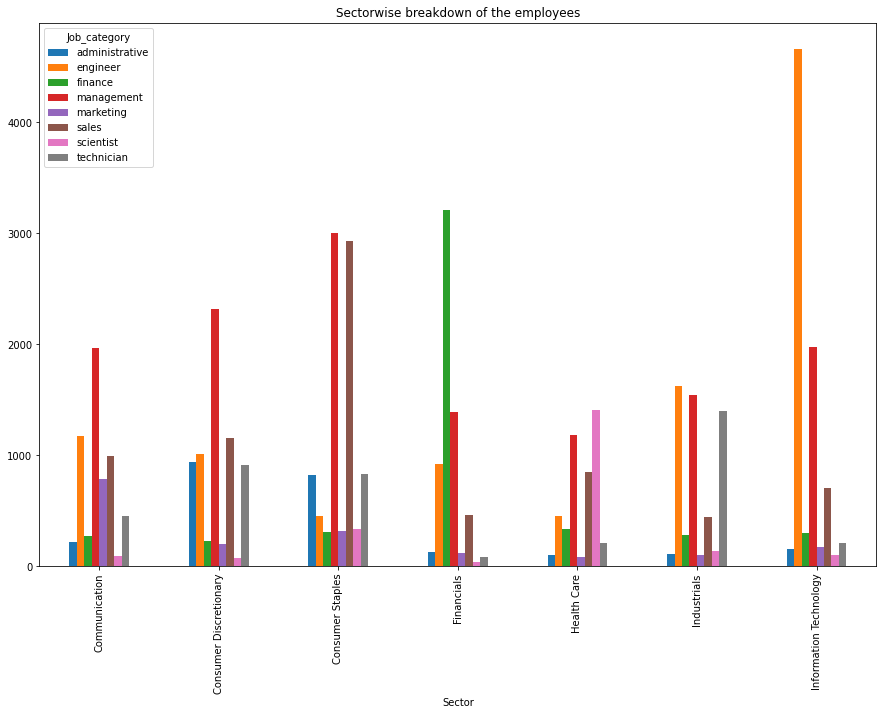

In [ ]:
fig, ax = plt.subplots(figsize =(15, 10))
industry_grp=df.groupby(["Sector","Job_category"])
industry_grp["Count"].mean().unstack(fill_value=0).plot.bar(ax=ax)
plt.title('Sectorwise breakdown of the employees')

As the graph above, we can tell: 

In Communucation sector, Comsumer Discretionary and Consumer Staples sector, **management** has the highest count.

In Financials sector, **finance** has the highest count.

In Heahth Care sector, **scientist** has the highest count.

In Industrials and Information Technology sector, not surprisingly, **engineer** has the highest count.

#### Top ten companies with the most number of employees

In [ ]:
#Extracting the top ten companies with the most number of employees
company_grp=df.groupby(["Company"])
top_ten=company_grp["Count"].sum().sort_values(ascending=False).iloc[:10].index
print(top_ten)

Index(['Walmart Inc', 'Tata Group',
       'International Business Machines Corporation', 'Accenture PLC',
       'Amazon.com, Inc.', 'AT&T', 'MICROSOFT CORPORATION',
       'CVS Health Corporation', 'General Electric Company',
       'FedEx Corporation'],
      dtype='object', name='Company')


#### Male vs Female breakdown in the top 10 companies

**Gender diversity** is important. Ensuring equal representation of men and women in the workplace has positive effects across the entire organization. Having an inclusive culture in the workplace boosts morale and opportunity. Inclusive workplaces tend to have lower employee churn rates – which represents big savings in terms of time and money spent on recruitment. Let's take a look at the female and male employee counts across the top ten companies.

Text(0.5, 1.0, 'Male vs Female breakdown in the top 10 companies')

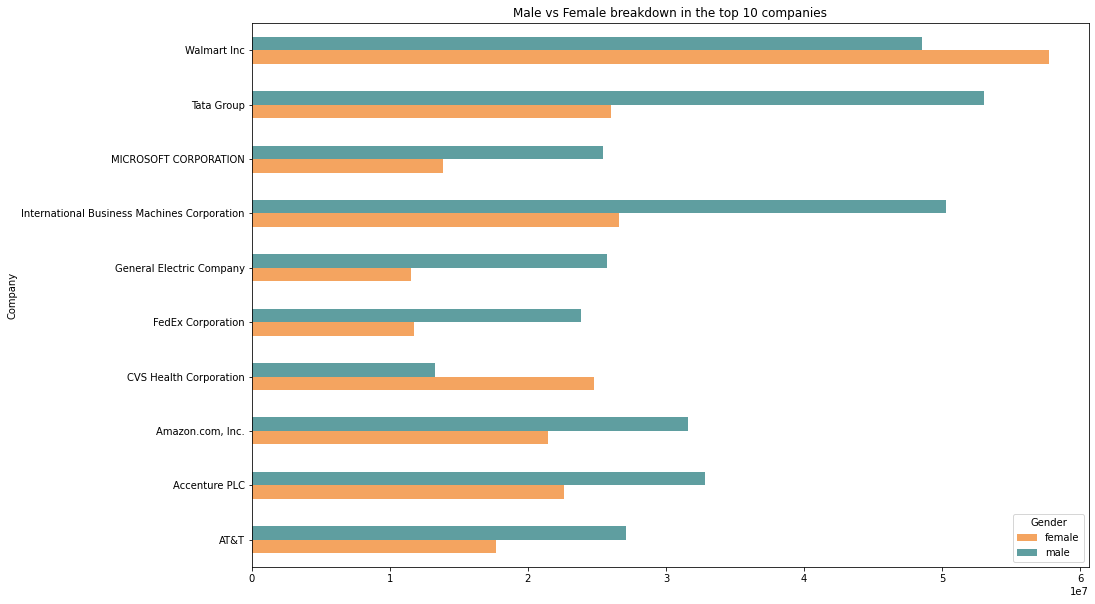

In [ ]:
# Plotting the Male vs Female breakdown in the top 10 companies
fig, ax = plt.subplots(figsize =(15, 10))
new=df[df['Company'].isin(top_ten)][["Company","Gender","Count"]]
df3=new.groupby(["Company","Gender"])
df3["Count"].sum().unstack(fill_value=0).plot.barh(ax=ax,color=['sandybrown','cadetblue'])
plt.title('Male vs Female breakdown in the top 10 companies')

#### Male vs Female breakdown among all the companies

While the general trend noticed across all companies in our dataset shows that the male population is greater than the female in a lot of companies but the gap isn't that sharp in most. It looks like the organizations are trying to get the gender balance right.

Text(0.5, 1.0, 'Male vs Female breakdown among all the companies')

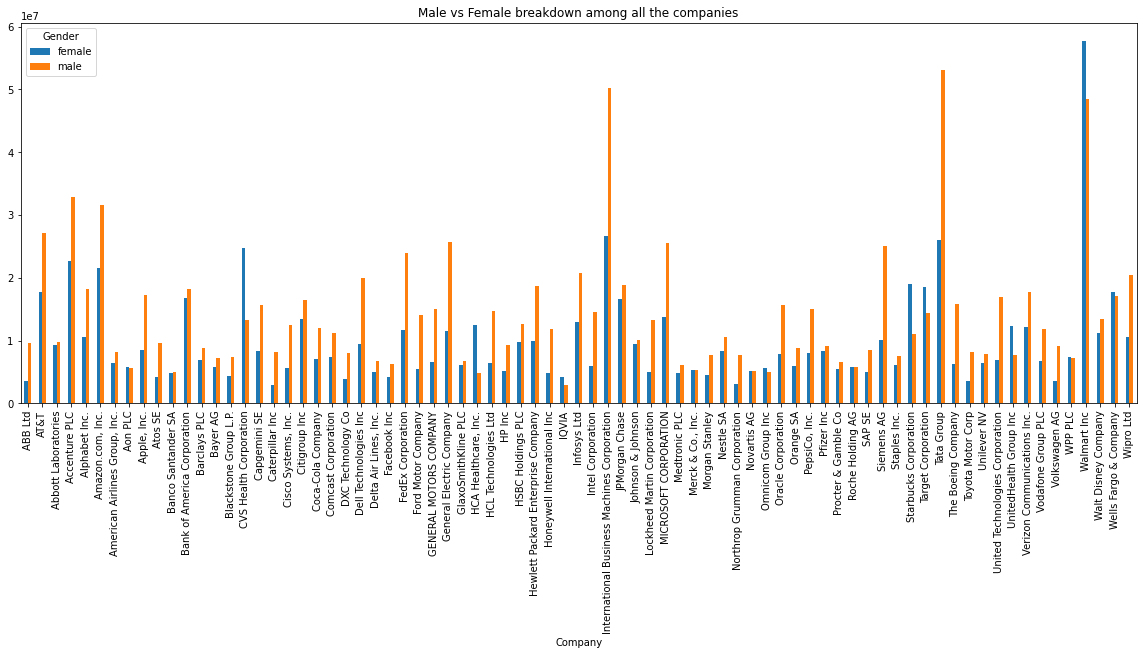

In [ ]:
fig, ax = plt.subplots(figsize =(20, 7))
industry_grp=df.groupby(["Company","Gender"])
industry_grp["Count"].sum().sort_values(ascending=False).unstack(fill_value=0).plot.bar(ax=ax)
plt.title('Male vs Female breakdown among all the companies')

#### Employee count varying across the globe

In [ ]:
world = geopandas.read_file(geopandas.datasets.get_path('naturalearth_lowres'))
Seven_continents = world['continent'].unique()
df_reg = df.groupby(['Region'])['Count'].sum().reset_index()
df_reg.sort_values(by=["Count"], ascending=False)

,Region,Count
6,Northern America,973579325.55213
11,Southern Asia,313816835.64503
7,Northern Europe,94417076.88263
14,Western Europe,84694219.36481
9,South America,64199917.33674
10,South-Eastern Asia,51503118.85693
3,Eastern Asia,48182463.64980
12,Southern Europe,42008451.18178
4,Eastern Europe,40033436.97695
1,Central America and the Caribbean,37623453.67521


In [ ]:
dic = {}
for l, i, j in df_reg.itertuples():
  if i == 'Arab States':
    dic['Africa'] = dic.get('Africa', 0.0) + j
  elif i == 'Central America and the Caribbean':
    dic['North America'] = dic.get('North America', 0.0) + j
  elif i == 'Pacific Islands':
    dic['Oceania'] = dic.get('Pacific Islands', 0.0) + j
  else:
    for k in Seven_continents:
      #print(j)
      if k in i:
        dic[k] = dic.get(k, 0.0) + j
dic['Seven seas (open ocean)'] = 0
dic['Antarctica'] = 0
df_continents = pd.DataFrame.from_dict(dic,orient='index',columns=['Count'])
df_continents = df_continents.reset_index()

In [ ]:
world['Count'] = ""
for key, val in dic.items():
 world['Count'] = np.where(world['continent'] == key , val, world['Count'] * 1)

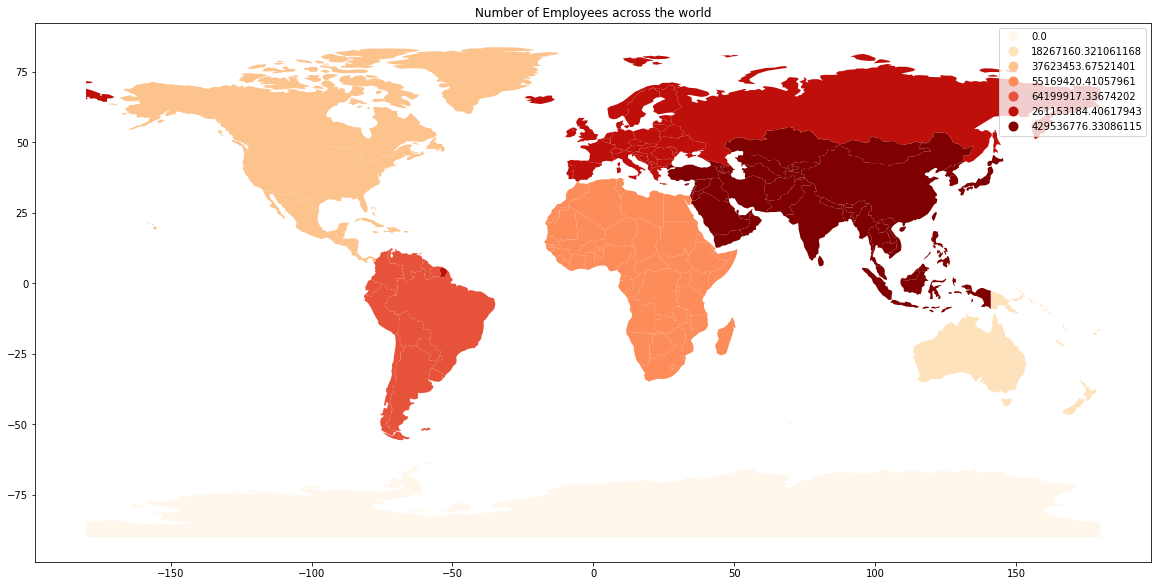

In [ ]:
# Plotting Number of Employees across the world
fig, ax = plt.subplots(figsize=(20, 10))
plt.title("Number of Employees across the world")
world.plot(column='Count', ax=ax, cmap='OrRd',legend=True)

#### Gender differences across region & job categories



In [ ]:
df_gpr = df.groupby(['Region','Gender'])['Count'].sum().unstack().reset_index()
df_gpr['M/F_ratio'] = df_gpr['male']/df_gpr['female']
df_gpr.sort_values(by=['M/F_ratio'], ascending=False)

Gender,Region,female,male,M/F_ratio
0,Arab States,5131932.07207,11726544.02215,2.28502
5,Northern Africa,4867382.93219,9651719.30303,1.98294
11,Southern Asia,107581585.72590,206235249.91914,1.91701
2,Central and Western Asia,5663982.58675,10370375.59236,1.83093
14,Western Europe,31181516.54816,53512702.81665,1.71617
8,Pacific Islands,6856511.20187,11410649.11919,1.66421
7,Northern Europe,35738925.39399,58678151.48864,1.64186
1,Central America and the Caribbean,14715453.76044,22907999.91477,1.55673
9,South America,25263608.03772,38936309.29903,1.54120
12,Southern Europe,17097049.35315,24911401.82864,1.45706


Text(0.5, 1.0, 'Male vs Female breakdown across Regions')

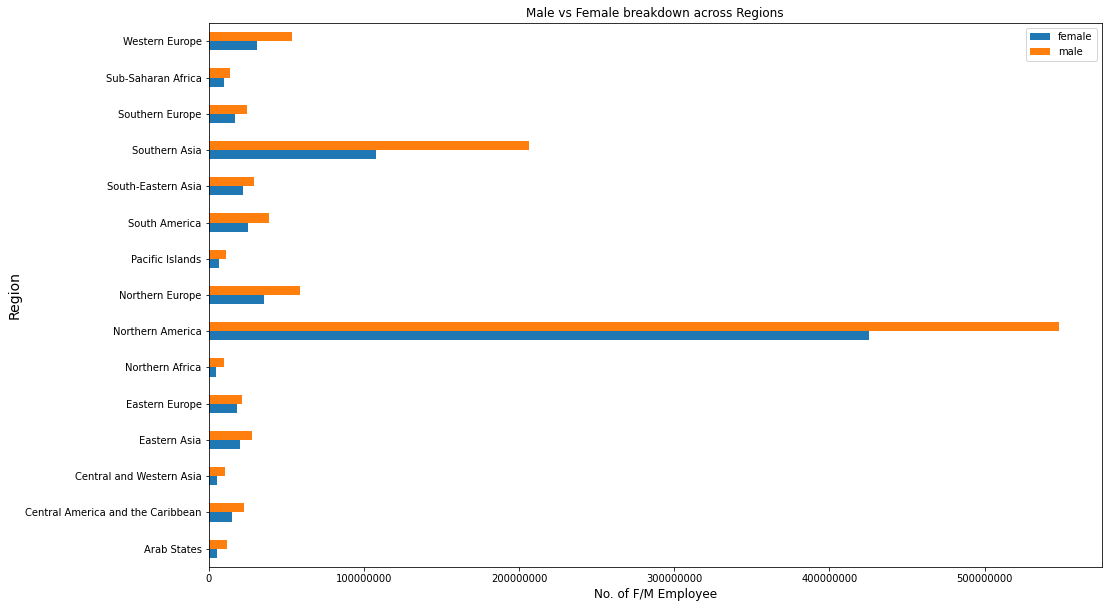

In [ ]:
# No of Male vs Females across regions
fig,ax = plt.subplots()
ax = df_gpr.plot(x = 'Region', y = ['female', 'male'], kind='barh', ax=ax,  legend=False, figsize = (16,10))
ax.set_xlabel("No. of F/M Employee", fontsize=12)
ax.set_ylabel("Region", fontsize=14)
ax.get_xaxis().set_major_formatter(tick.FuncFormatter(lambda x, p: format(int(x))))
plt.legend(loc = 'upper right',
           bbox_transform=plt.gcf().transFigure)
plt.title('Male vs Female breakdown across Regions')

Text(0.5, 1.0, 'Male vs Female breakdown among job category')

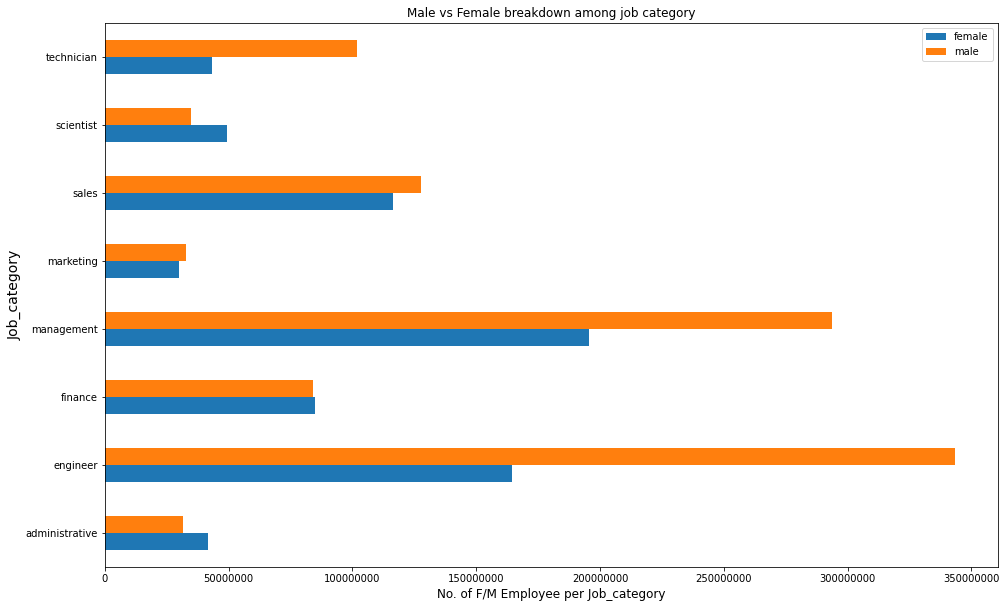

In [ ]:
# No of Male vs females across job categories
fig,ax = plt.subplots()
ax = df.groupby(['Job_category','Gender'])['Count'].sum().unstack().reset_index().plot(x = 'Job_category', y = ['female', 'male'], kind='barh', ax=ax, legend=False, figsize = (16,10))
ax.set_xlabel("No. of F/M Employee per Job_category", fontsize=12)
ax.set_ylabel("Job_category", fontsize=14)
ax.get_xaxis().set_major_formatter(tick.FuncFormatter(lambda x, p: format(int(x))))
plt.legend(loc = 'upper right',
           bbox_transform=plt.gcf().transFigure)
plt.title('Male vs Female breakdown among job category')

In [ ]:
#Calculating the M/F ratio across Job category
df_gpj = df.groupby(['Job_category','Gender'])['Count'].sum().unstack().reset_index().set_index('Job_category')
df_gpj['M/F_ratio'] = df_gpj['male']/df_gpj['female']
df_gpj.sort_values(by=['M/F_ratio'], ascending=False)

Gender,female,male,M/F_ratio
Job_category,,,
technician,43425039.21506,101944779.54075,2.34760
engineer,164293956.65128,343379894.89028,2.09003
management,195731189.78041,293708481.10026,1.50057
sales,116306278.46365,127924022.76353,1.09989
marketing,29934521.03711,32633086.33294,1.09015
finance,84854755.27972,84018660.22259,0.99015
administrative,41637755.21128,31559662.92505,0.75796
scientist,49349177.38321,34947257.88969,0.70816


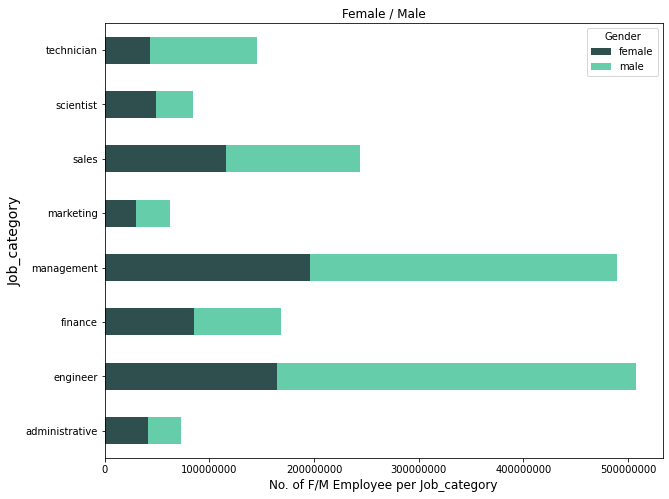

In [ ]:
fig, ax = plt.subplots()
df_gpj[["female", "male"]].plot.barh(
        stacked=True,
        ax=ax,
        figsize=(10,8),
        linewidth=2,
        color=['darkslategray', 'mediumaquamarine'],
        title ='Female / Male')
ax.set_xlabel("No. of F/M Employee per Job_category", fontsize=12)
ax.set_ylabel("Job_category", fontsize=14)
ax.get_xaxis().set_major_formatter(tick.FuncFormatter(lambda x, p: format(int(x))))

### Data analysis of Information Technology Sector 

In [ ]:
df_info = df.loc[df.Sector == 'Information Technology']
df_info

,Company,Sector,Month,Job_category,Region,Gender,Count,Inflow,Outflow
0,SAP SE,Information Technology,2013-10,technician,South America,female,50.71196,0.48491,1.40646
2,MICROSOFT CORPORATION,Information Technology,2013-10,scientist,Northern America,male,1541.79978,31.27633,21.68564
3,DXC Technology Co,Information Technology,2013-10,sales,Western Europe,female,62.10336,3.42875,0.00404
6,IQVIA,Information Technology,2013-10,technician,Eastern Europe,female,11.15343,0.00001,0.00000
10,Infosys Ltd,Information Technology,2013-10,marketing,Northern Africa,female,14.16630,0.00000,0.00000
...,...,...,...,...,...,...,...,...,...
2379019,Intel Corporation,Information Technology,2018-11,NaN,Northern Africa,female,6.90027,0.15100,0.00082
2379023,IQVIA,Information Technology,2018-01,NaN,South-Eastern Asia,male,47.21852,2.44593,1.32307
2379027,IQVIA,Information Technology,2018-04,NaN,South-Eastern Asia,male,46.90626,1.87323,0.35936
2379029,International Business Machines Corporation,Information Technology,2015-09,NaN,Northern Europe,male,981.67500,32.83342,25.77147


#### Where do most of the Information Technology companies locate?

In [ ]:
gdf = df_info.groupby('Region')['Count'].sum().reset_index()
gdf.sort_values(by=["Count"], ascending=False)

,Region,Count
11,Southern Asia,230329942.83476
6,Northern America,157323199.57988
7,Northern Europe,30695333.90842
14,Western Europe,26357269.18782
3,Eastern Asia,21201288.42970
10,South-Eastern Asia,20866946.50734
4,Eastern Europe,17460831.20429
9,South America,16354190.82714
12,Southern Europe,13057686.65841
1,Central America and the Caribbean,8766986.10135


Most of the IT companies locate in Southern Asia and Northern America.

Let's plot it out!

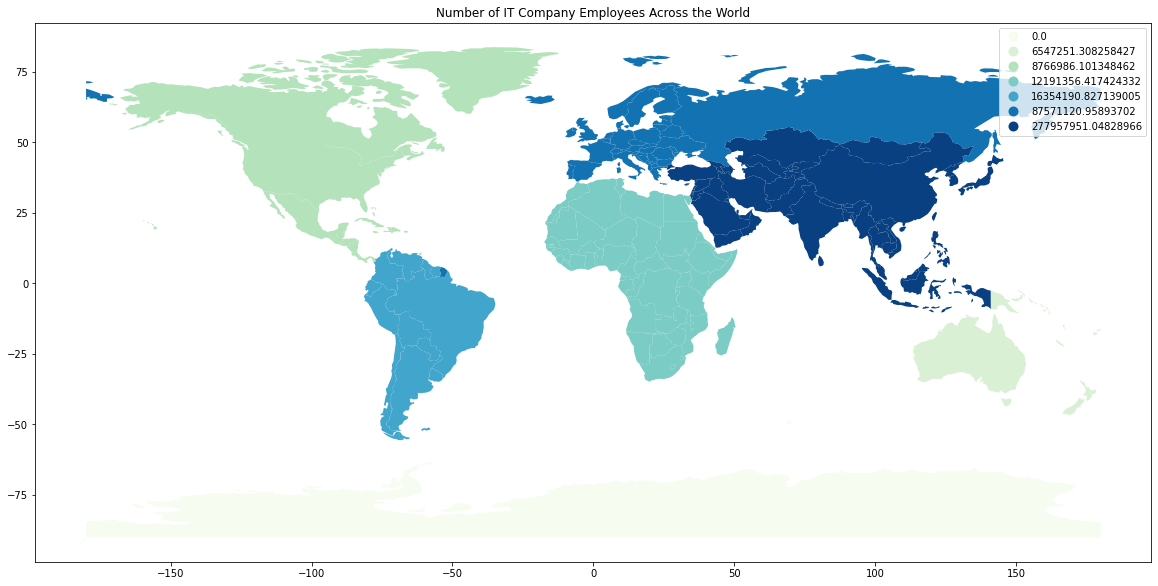

In [ ]:
dic_info = {}
for l, i, j in gdf.itertuples():
  #print(i,j,l)
  if i == 'Arab States':
    dic_info['Africa'] = dic_info.get('Africa', 0.0) + j
  elif i == 'Central America and the Caribbean':
    dic_info['North America'] = dic_info.get('North America', 0.0) + j
  elif i == 'Pacific Islands':
    dic_info['Oceania'] = dic_info.get('Pacific Islands', 0.0) + j
  else:
    for k in Seven_continents:
      #print(j)
      if k in i:
        dic_info[k] = dic_info.get(k, 0.0) + j
dic_info['Seven seas (open ocean)'] = 0
dic_info['Antarctica'] = 0
df_continents_info = pd.DataFrame.from_dict(dic_info,orient='index',columns=['Count'])
df_continents_info = df_continents_info.reset_index()


world['Count'] = ""
for key, val in dic_info.items():
 world['Count'] = np.where(world['continent'] == key , val, world['Count'] * 1)

# Plotting Number of IT Companies across the world
fig, ax = plt.subplots(figsize=(20,10))
plt.title("Number of IT Company Employees Across the World")
world.plot(column='Count', ax=ax, cmap='GnBu', legend=True)

#### Inflow and Outflow 

##### Inflow and Outflow for specific Job category "Engineer"

In [ ]:
df_jc=df.loc[df.Job_category=="engineer"]

In [ ]:
df_jc_company=df_jc.groupby(['Company']).sum()
df_jc_company['Attrition Rate'] = (df_jc_company['Outflow']/df_jc_company['Inflow'])*100
df_jc_company=df_jc_company.sort_values(by=['Attrition Rate'], ascending=False)

In [ ]:
df_jc_company=df_jc_company[["Attrition Rate"]]

In [ ]:

df_jc_company=df_jc_company.sort_values(by=["Attrition Rate"], ascending=True)
df_jc_company=df_jc_company.iloc[:15]

Most preferred employers to work for by Engineers with Lowest Attrition rate (Top 5 being Facebook, Alphabet, GlaxoSmithKline PLC, Apple and Amazon)

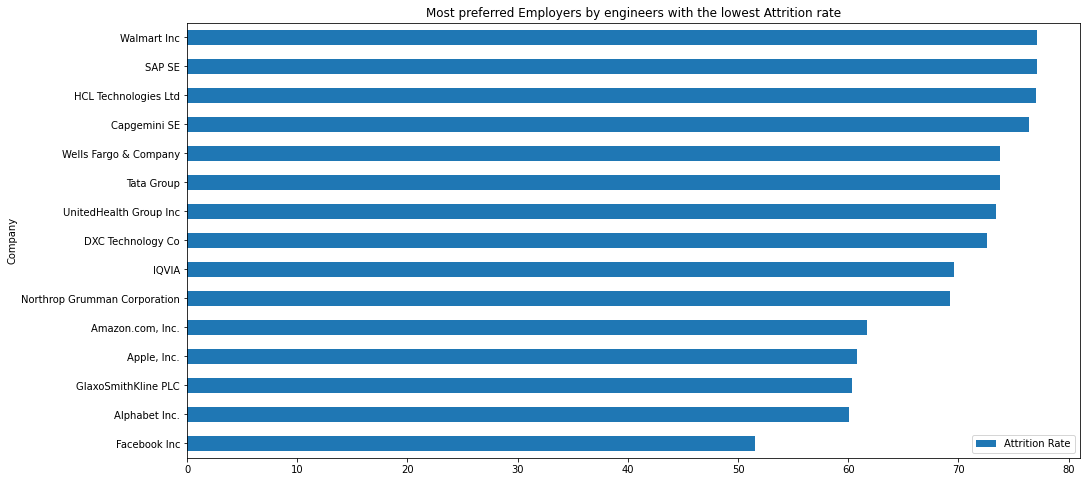

In [ ]:
fig, ax = plt.subplots()
df_jc_company.plot.barh(
        ax=ax,
        figsize=(16, 8),
        linewidth=2,
        color=['C0'],
        title ='Most preferred Employers by engineers with the lowest Attrition rate')

##### Inflow and Outflow of all Information Technology companies



In [ ]:
# Inflow and Outflow of all Information Technology companies 
df_info_company = df_info.groupby(['Company']).sum()
df_info_company[["Inflow", "Outflow"]]

,Inflow,Outflow
Company,,
Accenture PLC,1158277.57794,936084.86185
"Apple, Inc.",476136.93028,364802.31044
Atos SE,231347.33380,215735.63286
Capgemini SE,525123.73145,407135.91487
"Cisco Systems, Inc.",296771.70799,271885.92293
DXC Technology Co,260415.08102,186632.94365
Dell Technologies Inc,479842.68836,432078.09079
HCL Technologies Ltd,335449.32126,258495.14244
HP Inc,162057.32014,174965.42575


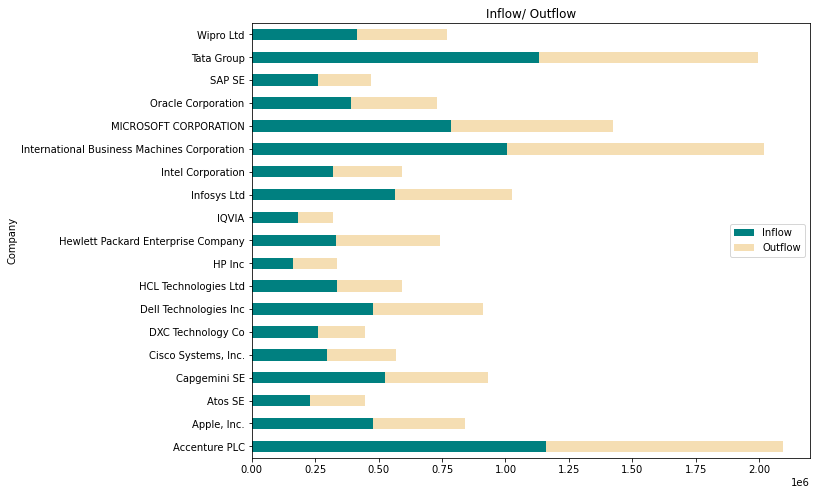

In [ ]:
fig, ax = plt.subplots()
df_info_company[["Inflow", "Outflow"]].plot.barh(
        stacked=True,
        ax=ax,
        figsize=(10,8),
        linewidth=2,
        color=['teal', 'wheat'],
        title ='Inflow/ Outflow')

##### Attrition rate among information Technology companies 

In [ ]:
# Attrition rate among information Technology companies 
df_info_company['Attrition Rate'] = (df_info_company['Outflow']/df_info_company['Inflow'])*100
df_info_company.sort_values(by=['Attrition Rate'], ascending=False)

,Count,Inflow,Outflow,Attrition Rate
Company,,,,
Hewlett Packard Enterprise Company,28741556.12847,331948.20536,411564.73970,123.98463
HP Inc,14399311.13691,162057.32014,174965.42575,107.96515
International Business Machines Corporation,76894894.88860,1005124.15135,1012487.12513,100.73254
Atos SE,13686936.49789,231347.33380,215735.63286,93.25183
"Cisco Systems, Inc.",18186887.74406,296771.70799,271885.92293,91.61450
Dell Technologies Inc,29522415.45179,479842.68836,432078.09079,90.04578
Oracle Corporation,23517716.31253,389429.11899,342080.57985,87.84155
Intel Corporation,20440154.98036,318738.25146,274927.04170,86.25480
Wipro Ltd,30978625.23166,414095.55001,354494.78137,85.60700


In [ ]:
ser1 = df_info_company.iloc[:, -1].round(2)
ser1

Company
Accenture PLC                                  80.82000
Apple, Inc.                                    76.62000
Atos SE                                        93.25000
Capgemini SE                                   77.53000
Cisco Systems, Inc.                            91.61000
DXC Technology Co                              71.67000
Dell Technologies Inc                          90.05000
HCL Technologies Ltd                           77.06000
HP Inc                                        107.97000
Hewlett Packard Enterprise Company            123.98000
IQVIA                                          76.41000
Infosys Ltd                                    81.42000
Intel Corporation                              86.25000
International Business Machines Corporation   100.73000
MICROSOFT CORPORATION                          81.50000
Oracle Corporation                             87.84000
SAP SE                                         80.84000
Tata Group                              

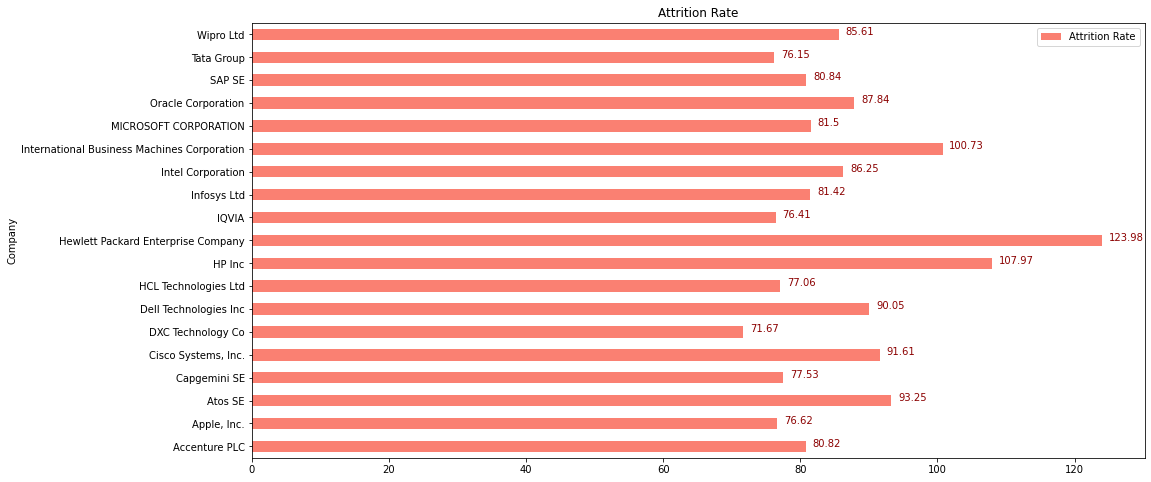

In [ ]:
fig, ax = plt.subplots()
df_info_company[['Attrition Rate']].plot.barh(
        ax=ax,
        figsize=(16, 8),
        linewidth=2,
        color=['salmon'],
        title ='Attrition Rate')

for i, v in enumerate(ser1):
    ax.text(v + 1, i, str(v), color='darkred')

**Hewlett Packard Enterprise Company has the highest attrition rate (123.98463).**

**DXC Technology Co has the lowest attrition rate (71.66749).**

In [ ]:
df_info_company.sort_values(by=['Attrition Rate'], ascending=False)

,Count,Inflow,Outflow,Attrition Rate
Company,,,,
Hewlett Packard Enterprise Company,28741556.12847,331948.20536,411564.73970,123.98463
HP Inc,14399311.13691,162057.32014,174965.42575,107.96515
International Business Machines Corporation,76894894.88860,1005124.15135,1012487.12513,100.73254
Atos SE,13686936.49789,231347.33380,215735.63286,93.25183
"Cisco Systems, Inc.",18186887.74406,296771.70799,271885.92293,91.61450
Dell Technologies Inc,29522415.45179,479842.68836,432078.09079,90.04578
Oracle Corporation,23517716.31253,389429.11899,342080.57985,87.84155
Intel Corporation,20440154.98036,318738.25146,274927.04170,86.25480
Wipro Ltd,30978625.23166,414095.55001,354494.78137,85.60700


#### Any patterns in a sepecific time frame? 


#### Top 5 companies with highest attrition rate

In [ ]:
# Look into details with the highest Attrition Rate
top_comps = df_info_company.sort_values(by=['Attrition Rate'], ascending=False).iloc[:5].index
df_top_comps = df_info.loc[df_info['Company'].isin(top_comps),:].groupby(['Month', 'Company']).sum()
df_top_comps['Attrition Rate'] = (df_top_comps['Outflow']/df_top_comps['Inflow'])*100

In [ ]:
df_ratio = df_top_comps.pivot_table(index='Month',columns='Company',values='Attrition Rate')

Text(0.5, 1.0, 'Highest Attrition Rate for specific time frames')

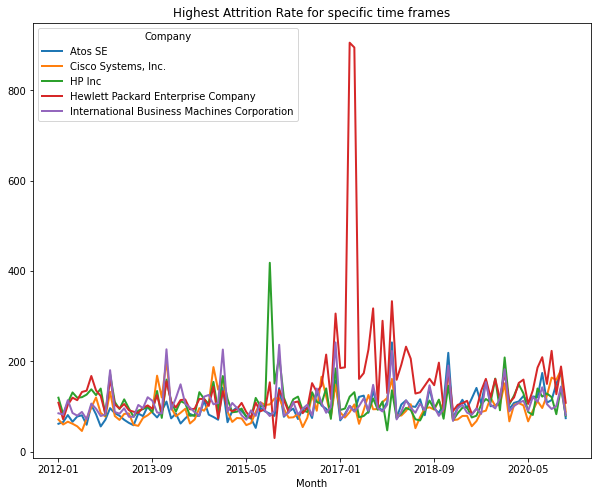

In [ ]:
fig, ax = plt.subplots()
df_ratio.plot(ax=ax,
         figsize=(10,8),
         linewidth=2)
plt.title('Highest Attrition Rate for specific time frames')

In [ ]:
df_top_comps.loc[df_top_comps['Attrition Rate'] > 900]

,,Count,Inflow,Outflow,Attrition Rate
Month,Company,,,,
2017-03,Hewlett Packard Enterprise Company,276334.28802,1758.75018,15931.26891,905.82899


#### Related Information 

Around March, 2017 Hewlett Packard Enterprise Company	had it's highest attrition rate. 


*   [Hewlett Packard Enterprise Is Losing Business From Microsoft](https://www.bloomberg.com/news/articles/2017-03-01/microsoft-said-to-cut-purchases-of-hpe-servers-for-cloud-service)
*   [Hewlett Packard Enterprise Is Said to Plan About 5,000 Job Cuts](https://www.bloomberg.com/news/articles/2017-09-21/hewlett-packard-enterprise-is-said-to-plan-about-5-000-job-cuts)


#### Top 3 Companies with the lowest atttrition rate 

In [ ]:
last_comps = df_info_company.sort_values(by=['Attrition Rate']).iloc[:3].index
df_last_comps = df_info.loc[df_info['Company'].isin(last_comps),:].groupby(['Month', 'Company']).sum()
df_last_comps['Attrition Rate'] = (df_last_comps['Outflow']/df_last_comps['Inflow'])*100
df_last_comps

Count      Inflow    Outflow  Attrition Rate
Month   Company                                                              
2012-01 DXC Technology Co  67449.46293  1481.35524 1380.04938        93.16127
        IQVIA              46061.05007  1989.86793 1319.53509        66.31270
        Tata Group        565131.38557 15902.28394 8242.37259        51.83138
2012-02 DXC Technology Co  66834.54847   765.13491  596.22882        77.92467
        IQVIA              45725.89503   984.38006  491.19652        49.89907
...                                ...         ...        ...             ...
2020-12 IQVIA              87726.01692  2680.18514 1923.69429        71.77468
        Tata Group        821166.60391  6729.89677 7295.20213       108.39991
2021-01 DXC Technology Co 141547.67254  2213.39676 1797.42748        81.20675
        IQVIA              88039.01871  2236.69607 1344.65343        60.11784
        Tata Group        826321.16226 12449.76047 7190.14554        57.75328

[327 rows x 4 columns]

Text(0.5, 1.0, 'Lowest attrition rate across specific time frames')

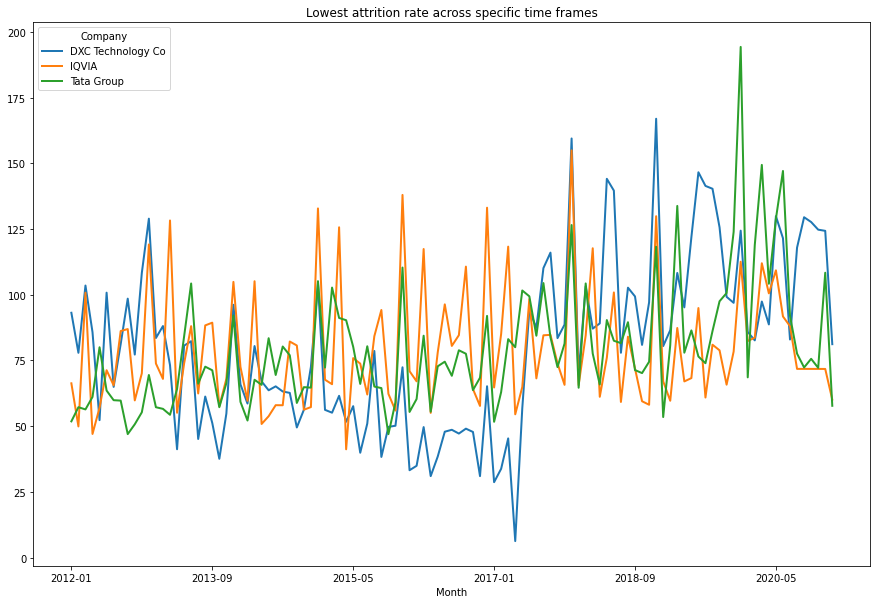

In [ ]:
df_ratio_last = df_last_comps.pivot_table(index='Month',columns='Company',values='Attrition Rate')
fig, ax = plt.subplots()
df_ratio_last.plot(ax=ax,
         figsize=(15,10),
         linewidth=2)
plt.title('Lowest attrition rate across specific time frames')

In [ ]:
df_last_comps.loc[df_last_comps['Attrition Rate'] < 25]

,,Count,Inflow,Outflow,Attrition Rate
Month,Company,,,,
2017-04,DXC Technology Co,146594.96285,34038.71528,2131.26616,6.26130


#### Related Information
Around April,2017 DXC Technology Co has the lowest attrition rate.

DXC Technology was founded in 2017 when the Hewlett Packard Enterprise Company (HPE) spun off its Enterprise Services business and merged it with Computer Sciences Corporation (CSC). At the time of its creation, DXC Technology had revenues of $25 billion, employed 170,000 people and operated in 70 countries.
